In [1]:
#Dependencies
import os
import numpy as np
import tensorflow as tf
import PIL
import pandas as pd


import keras 
from keras.preprocessing import image
from keras.models import Model
from keras.models import load_model
from keras.utils import to_categorical
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import (VGG19, preprocess_input, decode_predictions)

from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
# Trained Model
model = load_model("VGG19_trained_model_aug_mi_ep10.h5")

In [3]:
test_batch = 'images_split/test'

In [4]:
test_datagen = ImageDataGenerator(rescale=1. / 255)

test_batches = test_datagen.flow_from_directory(
                                directory=test_batch,
                                target_size=(224,224),  
                                classes=['animals','beaches','birds','electronics','fashion','nature','landmarks','people'],                           
                                batch_size=5
                                )       

Found 374 images belonging to 8 classes.


In [5]:
predictions = model.predict_generator(test_batches, 10)

C:\Users\KenJ\Anaconda3\lib\site-packages\PIL\Image.py:888: UserWarning: Palette images with Transparency   expressed in bytes should be converted to RGBA images
  'to RGBA images')


In [6]:
predictions

array([[  4.95086145e-03,   3.14600984e-10,   5.63781032e-06,
          4.00452773e-05,   9.41891611e-01,   3.25627411e-06,
          1.76226774e-06,   5.31067699e-02],
       [  2.60441446e-09,   1.45812684e-09,   1.71635807e-12,
          5.43157880e-12,   1.06843778e-09,   1.00000000e+00,
          4.70038675e-09,   1.06629052e-08],
       [  1.19277379e-02,   1.43212489e-07,   9.87121880e-01,
          8.31591080e-07,   6.75700340e-09,   1.99498118e-07,
          9.41280625e-04,   7.94092284e-06],
       [  1.32302055e-02,   7.07247376e-01,   2.00351747e-03,
          1.03354316e-04,   4.48306586e-04,   2.76973788e-02,
          2.46539161e-01,   2.73071090e-03],
       [  4.29054016e-05,   4.04591083e-10,   1.48572440e-06,
          2.10707242e-07,   9.93012130e-01,   1.26296669e-07,
          1.04065023e-07,   6.94297021e-03],
       [  9.21065629e-01,   7.79233622e-11,   9.45425592e-03,
          7.13821326e-04,   5.06445169e-02,   6.00714088e-07,
          3.34245260e-06,   1.8

In [7]:
classes = ['animals','beaches','birds','electronics','fashion','nature','landmarks','people']

df = pd.DataFrame(data = predictions[0:,0:],
            columns = classes)
df

,animals,beaches,birds,electronics,fashion,nature,landmarks,people
0,4.950861e-03,3.146010e-10,5.637810e-06,4.004528e-05,9.418916e-01,3.256274e-06,1.762268e-06,5.310677e-02
1,2.604414e-09,1.458127e-09,1.716358e-12,5.431579e-12,1.068438e-09,1.000000e+00,4.700387e-09,1.066291e-08
2,1.192774e-02,1.432125e-07,9.871219e-01,8.315911e-07,6.757003e-09,1.994981e-07,9.412806e-04,7.940923e-06
3,1.323021e-02,7.072474e-01,2.003517e-03,1.033543e-04,4.483066e-04,2.769738e-02,2.465392e-01,2.730711e-03
4,4.290540e-05,4.045911e-10,1.485724e-06,2.107072e-07,9.930121e-01,1.262967e-07,1.040650e-07,6.942970e-03
5,9.210656e-01,7.792336e-11,9.454256e-03,7.138213e-04,5.064452e-02,6.007141e-07,3.342453e-06,1.811791e-02
6,9.996476e-01,1.402241e-12,3.522353e-04,1.931750e-16,3.730480e-10,1.897056e-11,1.600357e-07,1.231821e-09
7,1.685626e-06,9.390892e-01,7.069888e-09,1.172800e-05,8.127057e-06,6.057672e-02,2.605771e-04,5.181352e-05
8,2.109073e-05,2.119797e-10,2.089449e-05,1.911952e-07,9.997498e-01,9.043112e-07,3.270494e-09,2.070200e-04
9,3.323827e-18,5.390773e-22,4.213034e-22,1.000000e+00,1.768848e-13,4.785447e-13,2.187866e-19,4.695863e-12


In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

means = df.mean()
means

animals        0.255252
beaches        0.072197
birds          0.028503
electronics    0.172730
fashion        0.183255
nature         0.091630
landmarks      0.051172
people         0.145260
dtype: float32

In [9]:
errors = df.std()
errors

animals        0.409531
beaches        0.246991
birds          0.146175
electronics    0.364982
fashion        0.361798
nature         0.275958
landmarks      0.170266
people         0.314520
dtype: float32

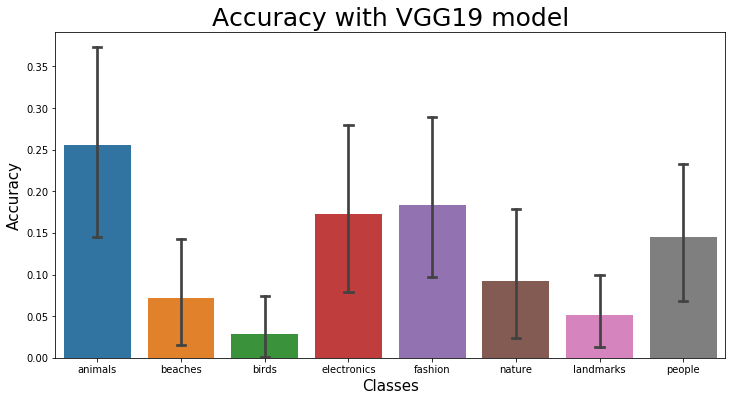

In [10]:
plt.figure(figsize=(12,6))
fig = sns.barplot(data=df, capsize=.1)
plt.xlabel("Classes", fontsize=15)
plt.ylabel("Accuracy", fontsize=15)
plt.title("Accuracy with VGG19 model", fontsize=25)
plt.show(fig)

In [11]:
d = {'Mean_Accuracy': means, 'Standard_Deviation': errors}
table_df = pd.DataFrame(data=d, index=classes)
table_df

,Mean_Accuracy,Standard_Deviation
animals,0.255252,0.409531
beaches,0.072197,0.246991
birds,0.028503,0.146175
electronics,0.172730,0.364982
fashion,0.183255,0.361798
nature,0.091630,0.275958
landmarks,0.051172,0.170266
people,0.145260,0.314520


In [13]:
from sklearn.metrics import confusion_matrix

In [48]:
np.mean(predictions[0])


0.12500001

In [43]:
y_true = np.reshape(np.array([1] * 400), (50, 8))
y_pred = predictions > 0.5

print (np.array(y_true).shape)
print (np.array(y_pred).shape)
confusion_matrix(y_true.argmax(axis=1), y_pred.argmax(axis=1))


(50, 8)
(50, 8)


array([[40, 10],
       [ 0,  0]], dtype=int64)

In [44]:
print (np.array(y_true))
print (np.array(y_pred))

[[1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1]]
[[False False False False False False  True False